In [170]:
## Nome: Pedro Gasparelo Leme - 14602421
## Nome: Gabriel Dezejácomo Maruschi - 14571525

# Codigo paara o curso de estatistica - Objetivo: analizar o tempo de processamento de diferentes algoritmos de ordenação dependendo do tamanho da entrada, sempre considerando um caso medio

## algoritmos a serem usados: BubbleSort/ SelectionSort -> BigO(n²) // MergeSort/QuickSort BigO(n Log[n]) // RadixSort BigO(nk). para n sendo o tamanho da entrad

In [171]:
# Imports

import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [172]:
## medir tempo inicio = time.perf_counter()

## definição das funções 

# BigO(n²)

def bubble_sort(arr): # ordena colocando o numero de maior valor na posição correta
    n = len(arr) # obtem tamanho do array para ser ordenado
    inicio = time.perf_counter() # inicia o contador de tempo antes da ordenação iniciar
    troca = False
    for i in range(n): 
        # passa pela lista do início até o penúltimo elemento
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                # troca os elementos se estiverem fora de ordem
                aux = arr[j]
                arr[j] = arr[j + 1] 
                arr[j + 1] = aux
                troca = True
        if troca == False: # se nao teve troca, entao nao precisa mais 
            break
    fim = time.perf_counter()
    return (fim - inicio) #retorna o tempo total para que ocorra a ordenação

def selection_sort(arr): # ordena os numeros de menores valores na posicao correta primeiro
    n = len(arr) # obtem tamanho do array para ser ordenado
    inicio = time.perf_counter() # inicia o contador de tempo antes da ordenação iniciar
    for i in range(n):
        # encontra o índice do menor elemento na parte não ordenada
        pos_min = i
        for j in range(i + 1, n):
            if arr[j] < arr[pos_min]:
                pos_min = j # guarda o indice do numero de menor valor 
        # Troca o menor elemento encontrado na sua posicao correta
        aux = arr[i]
        arr[i] = arr[pos_min]
        arr[pos_min] = aux
    fim = time.perf_counter()
    return (fim - inicio) #retorna o tempo total para que ocorra a ordenação

# BigO( n log[n] )

def merge_sort(arr):
    inicio = time.perf_counter() # inicia o contador de tempo antes da ordenação iniciar

    if len(arr) > 1: # se for igual a 1, retorna o proprio valor do array, voltando assim a arvore de recursao das metades separadas
        meio = len(arr) // 2
        esquerda = arr[:meio] # notação para array que copia todos os numeros do array original, da metade para frente
        direita = arr[meio:]  # notação para array que copia todos os numeros do array original, da metade para tras

        # Utiliza recursão para ordenar o array em metades
        merge_sort(esquerda)
        merge_sort(direita)

        # combina as duas metades ordenadas 
        i = j = k = 0
        while i < len(esquerda) and j < len(direita): # caso ainda esteja comparando os valores dos 2 arrays, pois eles ainda existem
            # verifica qual possui menor valor para colocar em ordem crescente no array de retorno
            if esquerda[i] < direita[j]:
                arr[k] = esquerda[i]
                i += 1
            else:
                arr[k] = direita[j]
                j += 1
            k += 1

        # caso ainda sobre valores em um array enquanto o outro ja foi finalizado, preenche o array de retorno com o restante
        while i < len(esquerda):
            arr[k] = esquerda[i]
            i += 1
            k += 1

        while j < len(direita):
            arr[k] = direita[j]
            j += 1
            k += 1
    fim = time.perf_counter()
    return (fim - inicio) #retorna o tempo total para que ocorra a ordenação
    
def quick_sort(arr):
    if len(arr) <= 1: # se tamanho do array for igual a 1, significa que a partição realizada pela chamada consecutiva da funcao recursiva, ja foi realizada
        return arr
    else:
        pivo = arr[0] # escolhendo o pivot como o primeiro elemento
        # coloca todos os valores do pivot escolhido a esquerda, caso eles sejam menores que o pivot
        menores = [x for x in arr[1:] if x <= pivo] 
        maiores = [x for x in arr[1:] if x > pivo]
        return quick_sort(menores) + [pivo] + quick_sort(maiores) # retorna a recursao da ordenação da metade menor que o pivot e maior que ainda devem ser organizadas

# Mede o tempo de execução do quicksort
def quick_sort_time(arr):
    inicio = time.perf_counter() # inicia o contador de tempo antes da ordenação iniciar
    quick_sort(arr)
    fim = time.perf_counter()
    return (fim - inicio) #retorna o tempo total para que ocorra a ordenação

#BioO(nk)

# definicao de uma função auxiliar que fara a contagem de digito a digito em especifico
def counting_sort_digito(arr, digito):
    n = len(arr) # obtem o tamanho da lista
    output = [0] * n # definicao da lista de saída, a qual esta inicialmente vazia
    count = [0] * 10 # definicao de um vetor para contar ocorrências de cada dígito (0-9)

    # loop que conta a frequência de cada dígito naquela casa decimal (unidade, dezena, etc.)
    for num in arr:
        index = (num // digito) % 10 # obtem o dígito atual do número
        count[index] += 1 # aumenta a contagem para aquele dígito

    # loop para acumular as posições, em quee count[i] contem a posicao final do digito i no output
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Constroi o array de saída (de trás pra frente para garantir estabilidade)
    for i in range(n - 1, -1, -1):
        index = (arr[i] // digito) % 10 # Extrai o dígito da posição atual
        output[count[index] - 1] = arr[i] # Coloca o número na posição correta no output
        count[index] -= 1 # Decrementa a posição para o próximo igual

    # Copia o array ordenado de volta para o original
    for i in range(n):
        arr[i] = output[i]

# Função principal: Radix Sort
def radix_sort(arr):
    inicio = time.perf_counter()
    
    if len(arr) == 0: # Caso a lista esteja vazia
        return arr
    max_num = max(arr) # Encontra o maior número da lista
    digito = 1 # Começa pelas unidades (1 = 10^0)

    # Repete o counting sort para cada casa decimal (unidade, dezena, centena...)
    while max_num // digito > 0: # Enquanto houver dígitos a processar
        counting_sort_digito(arr, digito)
        digito *= 10 # Vai para a próxima casa decimal (10, 100, ...)

    fim = time.perf_counter()
    return (fim - inicio) #retorna o tempo total para que ocorra a ordenação

In [173]:
# Vetor com os tamanhos
sizes_f = 5000
sizes_pace = 25
sizes = list(range(sizes_pace, sizes_f, sizes_pace))

In [174]:
# Coleta dos tempos para entradas variadas
resultados = []
for i in sizes:
    np.random.seed(int(time.perf_counter()))
    arr = list(np.random.randint(0, sizes_f, i))

    # Tempo do bubble-sort
    time_bubble = bubble_sort(arr.copy())

    # Tempo do selection-sort
    time_slct = selection_sort(arr.copy())

    # Tempo do merge-sort
    time_merge = merge_sort(arr.copy())

    # Tempo do quick-sort
    time_quick = quick_sort_time(arr.copy())

    # Tempo do radix-sort
    time_radix = radix_sort(arr.copy())

    resultados.append({
        "Tamanho do vetor" : i,
        "Tempo Bubble-sort": time_bubble,
        "Tempo Selection-sort": time_slct,
        "Tempo Merge-Sort": time_merge,
        "Tempo Quick-sort": time_quick,
        "Tempo Radix-sort": time_radix})

# Conversão para DataFrame
df = pd.DataFrame(resultados)
        
    

In [203]:
# Coleta dos tempos para entradas de tamanho constante.
m = 50
tamanho = 5000
resultadosConstante = []

for j in range(0, m):
    np.random.seed(int(time.perf_counter()))
    arr = list(np.random.randint(0, 10000, tamanho))
    
    # Tempo do bubble-sort
    time_bubble = bubble_sort(arr.copy())

    # Tempo do selection-sort
    time_slct = selection_sort(arr.copy())

    # Tempo do merge-sort
    time_merge = merge_sort(arr.copy())

    # Tempo do quick-sort
    time_quick = quick_sort_time(arr.copy())

    # Tempo do radix-sort
    time_radix = radix_sort(arr.copy())

    resultadosConstante.append({
        "Iteracao" : j,
        "Tempo Bubble-sort": time_bubble,
        "Tempo Selection-sort": time_slct,
        "Tempo Merge-Sort": time_merge,
        "Tempo Quick-sort": time_quick,
        "Tempo Radix-sort": time_radix})
    
df2 = pd.DataFrame(resultadosConstante)

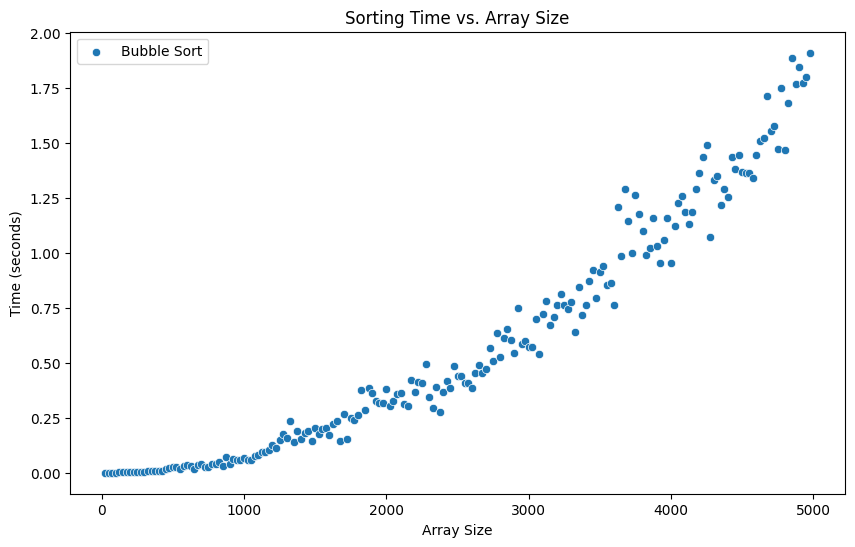

In [176]:
# Plotando resultados BubbleSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do vetor', y='Tempo Bubble-sort', label='Bubble Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

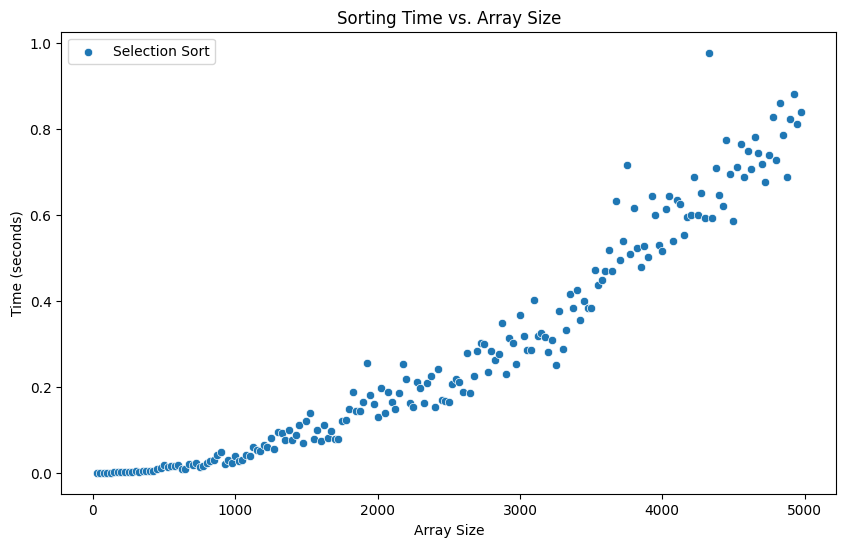

In [177]:
# Plotando resultados SelectionSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do vetor', y='Tempo Selection-sort', label='Selection Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

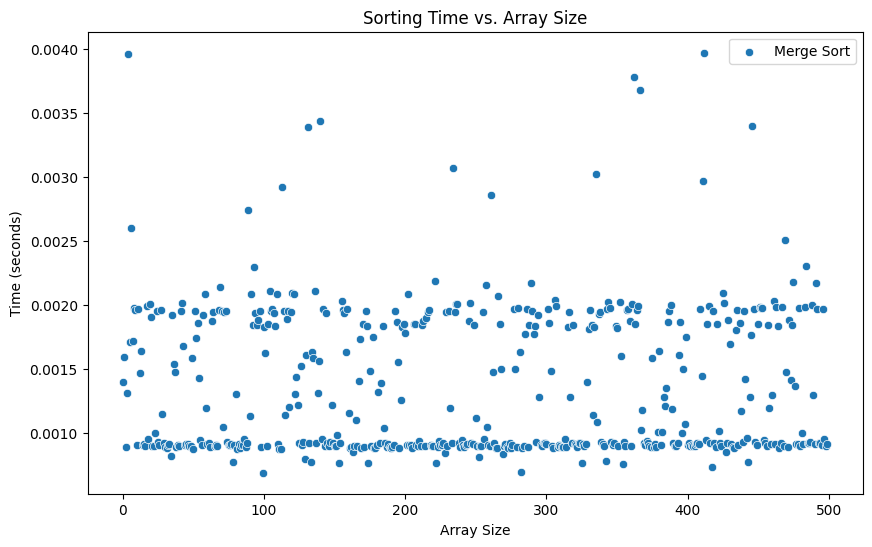

In [178]:
# Plotando resultados MergeSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Iteracao', y='Tempo Merge-Sort', label='Merge Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

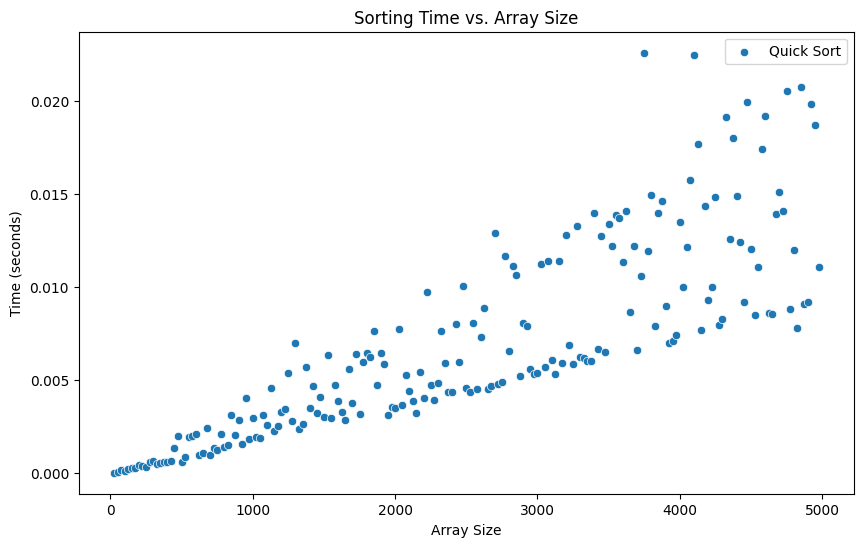

In [179]:
# Plotando resultados QuickSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do vetor', y='Tempo Quick-sort', label='Quick Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

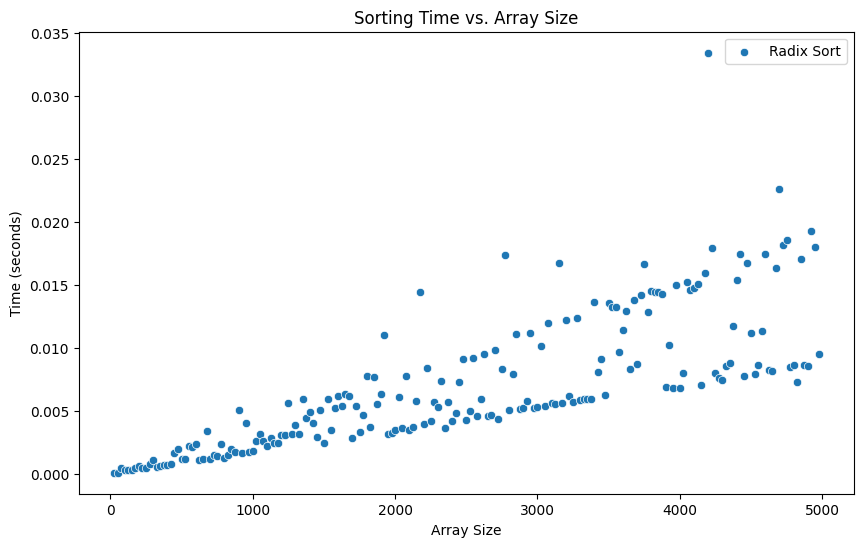

In [180]:
# Plotando resultados RadixSort

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do vetor', y='Tempo Radix-sort', label='Radix Sort')
plt.title("Sorting Time vs. Array Size")
plt.xlabel("Array Size")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()

In [181]:
# Exporta o Dataframe para um .csv
fileName = "sortingTimes.csv"

df.to_csv(fileName, index=False)

In [182]:
# Findada a coleta de dados, temos
# df : DataFrame com os tempos de execução de cada algoritmo para entradas de dados de tamanhos variadas
# df2: DataFrame com os tempos de execução de cada algorimo para varias entradas com tamanhos iguais

# Para tamanhos constantes, encontraremos a média por inferência estatística com o uso de um intervalo de confiança. Vale lembrar que a variância é desconhecida.
# Vale destacar que apesar de usarmos distribuição t de Student, o valor convergeria caso usássemos a distribuição normal padrão, já que n>>30 
def MediaInferencia(arr):

    amostra_py = arr.to_list()
    amostra = np.array(amostra_py)
    
    n = len(amostra)
    mediaAmostra = np.mean(amostra)
    desvioAmostra = np.std(amostra, ddof=1)  # ddof=1 para estimador nao-viesado

    alpha = 0.05  # 95% confiança
    tCritico = stats.t.ppf(1 - alpha/2, df=n-1)
    margemErro = tCritico * (desvioAmostra / np.sqrt(n))

    limiteInf = mediaAmostra - margemErro
    limiteSup = mediaAmostra + margemErro

    print(f"Media da Amostra (x̄): {mediaAmostra:.4f} s")
    print(f"Margem de erro: ±{margemErro:.6f} s")
    print(f"95% Intervalo de confiança da Média da população: [{limiteInf:.4f}, {limiteSup:.4f}] sec")


In [183]:
# Média da população para tempo de execução do BubbleSort
print("Bubble-sort:")
MediaInferencia(df2['Tempo Bubble-sort'])
print()

# Média da população para tempo de execução do SelectionSort
print("Selection-sort:")
MediaInferencia(df2['Tempo Selection-sort'])
print()

# Média da população para tempo de execução do MergeSort
print("Merge-sort")
MediaInferencia(df2['Tempo Merge-Sort'])
print()

# Média da população para tempo de execução do QuickSort
print("Quick-sort")
MediaInferencia(df2['Tempo Quick-sort'])
print()

# Média da população para tempo de execução do RadixSort
print("Radix-sort")
MediaInferencia(df2['Tempo Radix-sort'])
print()

Bubble-sort:
Media da Amostra (x̄): 0.0161 s
Margem de erro: ±0.000495 s
95% Intervalo de confiança da Média da população: [0.0156, 0.0166] sec

Selection-sort:
Media da Amostra (x̄): 0.0085 s
Margem de erro: ±0.000284 s
95% Intervalo de confiança da Média da população: [0.0082, 0.0088] sec

Merge-sort
Media da Amostra (x̄): 0.0014 s
Margem de erro: ±0.000051 s
95% Intervalo de confiança da Média da população: [0.0013, 0.0014] sec

Quick-sort
Media da Amostra (x̄): 0.0012 s
Margem de erro: ±0.000042 s
95% Intervalo de confiança da Média da população: [0.0011, 0.0012] sec

Radix-sort
Media da Amostra (x̄): 0.0010 s
Margem de erro: ±0.000038 s
95% Intervalo de confiança da Média da população: [0.0009, 0.0010] sec



In [190]:
# Para tempo variante, calcularemos a Correlação de Spearman (BUSCAR BIBLIOGRAFIA) entre tamanho da entrada e tempo de execução
# Para rho aprox. = 1 e p < 0,05 confirma-se uma relação monotonica
from scipy.stats import spearmanr

def CorrelacaoSpearman(arr1, arr2):
    array1 = np.array(arr1.to_list())
    array2 = np.array(arr2.to_list())
    
    rho, p_value = spearmanr(array1, array2)
    print(f"Spearman’s ρ: {rho:.3f} (p-value: {p_value:.3f})")

In [191]:
# Correlação de Spearman para Tamanho do vetor x Tempo de execução BubbleSort
print("Bubble Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Bubble-sort'])
print()

# Correlação de Spearman para Tamanho do vetor x Tempo de execução SelectionSort
print("Selection Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Selection-sort'])
print()

# Correlação de Spearman para Tamanho do vetor x Tempo de execução MergeSort
print("Merge Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Merge-Sort'])
print()

# Correlação de Spearman para Tamanho do vetor x Tempo de execução QuickSort
print("Quick Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Quick-sort'])
print()

# Correlação de Spearman para Tamanho do vetor x Tempo de execução RadixSort
print("Radix Sort")
CorrelacaoSpearman(df['Tamanho do vetor'], df['Tempo Radix-sort'])
print()

Bubble Sort
Spearman’s ρ: 0.993 (p-value: 0.000)

Selection Sort
Spearman’s ρ: 0.989 (p-value: 0.000)

Merge Sort
Spearman’s ρ: 0.887 (p-value: 0.000)

Quick Sort
Spearman’s ρ: 0.899 (p-value: 0.000)

Radix Sort
Spearman’s ρ: 0.872 (p-value: 0.000)



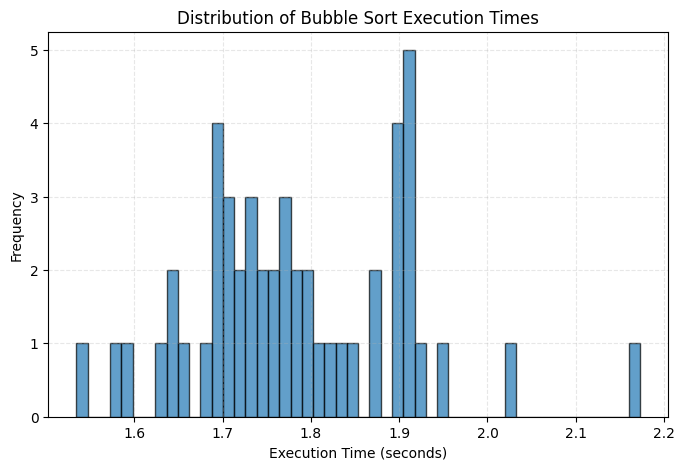

In [209]:

plt.figure(figsize=(8, 5))
plt.hist(df2["Tempo Bubble-sort"], bins=m, edgecolor="black", alpha=0.7)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Bubble Sort Execution Times")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()